## **[:+:] -- Registration & Alignment for Neuroimagery -- [:+:]** 

In [1]:
from pystackreg import StackReg
from skimage import io
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import glob
import tifffile as tif
import numpy as np
import scipy.io 
from scipy.io import loadmat
import os 
import imageio 
import seaborn as sns 
#import cv2
#import pandas as pd

# import sys
# print(sys.path)
# [+]- Load .MAT file, decide output directory of resulting TIFF files
matPath = (r'C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\MAT_files') 
# matFile= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\MAT_sample\Norm_Mouse56_SNS.mat")
refMouse= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\MAT_sample\Norm_Mouse56_SNS.mat")
samplePath= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\MAT_sample")
tiffPath = (r'C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_files') 
tiffFile= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\MAT_sample\Norm_Mouse56_SNS.tiff")
subStackPath= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_subStacks")
subStackPath1= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_subStacks\p1")
# subStackPath2= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_subStacks\secondHalf")
superStackPath= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_superStacks")
registeredPath= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered")


## __[+]__ Functions

In [2]:
def heuristics(filename, beginDex=0):
    if os.path.isfile(filename):
        baseName = os.path.basename(filename)
        if baseName.endswith('.mat'): 
            print("\n[::] --- Fields of the MAT file: --- " + str(filename))
            filename= loadmat(filename)
            vTensor = filename['MouseData']
            print(filename.keys())
            print("Header: " + str(filename['__header__']))
            print("Version: " + str(filename['__version__']))
            print("Globals: " + str(filename['__globals__']))
            print("[::] --- Type and dimensions of MAT img data: ")
            print(type(vTensor))
            print((vTensor.shape))
            print("Elements of type: " + str(type(vTensor[0][0][0])))
            print((vTensor[0][0][0+beginDex]))
            print((vTensor[1][1][1+beginDex]))
            print((vTensor[2][2][2+beginDex]))
        elif baseName.endswith('.tiff'):
            print("\n[::] --- Type and dimensions of TIFF File: --- " + str(filename))
            filename= io.imread(filename)
            print(type(filename))
            shape= filename.shape
            print("Shape: " + str(shape))
            if len(shape)==3 :
                print("Elements of type: " + str(type(filename[0][0][0])))
                print((filename[0][0][0]))
                print((filename[1][1][1]))
                print((filename[2][2][2]))
            else: 
                print("Elements of type: " + str(type(filename[0][0])))
                print((filename[0][0]))
                print((filename[1][1]))
                print((filename[2][2]))
        else: print("\nInvalid File type, no heuristics")
    elif isinstance(filename, np.ndarray):
        print("\n[::] --- Type and dimensions of Tensor: --- " )
        shape= filename.shape
        print("Shape: " + str(shape))
        if len(shape)==3 :
            print("Elements of type: " + str(type(filename[0][0][0])))
            print((filename[0][0][0]))
            print((filename[1][1][1]))
            print((filename[2][2][2]))
        else: 
            print("Elements of type: " + str(type(filename[0][0])))
            print((filename[0][0]))
            print((filename[1][1]))
            print((filename[2][2]))
    else: print("\nNo heuristics, Invalid Input")



def mattotiff(matFile, outPath, beginDex=0, enDex=3600, showHeuristics=False, addendum=""):
    matData= loadmat(matFile)
    vTensor = matData['MouseData']

    # [+]- Specify a subset of the video frame tensor
    vTensor= vTensor[:, :, beginDex:enDex]

    # [+]- Save 3d tensor as a tiff image stack, saves into current directory by default
    matBaseName = os.path.basename(matFile)
    tiffName = os.path.splitext(matBaseName)[0] + addendum+".tiff"
    output_filename = os.path.join(outPath, tiffName)
    tif.imsave(output_filename, vTensor, bigtiff=True)

    #[+]- Access the new  TIFF file, and makes sure its dimensions are proper
    if showHeuristics:
        print("matFile: " + matFile)
        print("matBaseName: " + matBaseName)
        print("tiffName: " + tiffName)
        print("output_filename: " + output_filename)
        heuristics(matFile, beginDex)
        heuristics((output_filename, beginDex))
    return output_filename

## __[+]:.__ Process .MAT Reference Files

In [7]:
# [+]- Find the reference MAT file, convert it into a TIFF img stack, then extract the substack
#tiffRef= mat_to_tiff(matFile, outPath=samplePath, showHeuristics= True)
# refFile100= mattotiff(matFile= refMouse, outPath= samplePath, beginDex=0, enDex=100, showHeuristics= True, addendum= "x100")
# refFile200= mattotiff(matFile= refMouse, outPath= samplePath, beginDex=0, enDex=200, showHeuristics= True, addendum= "x200")
# refFile300= mattotiff(matFile= refMouse, outPath= samplePath, beginDex=0, enDex=300, showHeuristics= True, addendum= "x300")
refFile180_300= mattotiff(matFile= refMouse, outPath= samplePath, beginDex=180, enDex=300, showHeuristics= True, addendum= "x180_300")

matFile: C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\MAT_sample\Norm_Mouse56_SNS.mat
matBaseName: Norm_Mouse56_SNS.mat
tiffName: Norm_Mouse56_SNSx180_300.tiff
output_filename: C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\MAT_sample\Norm_Mouse56_SNSx180_300.tiff

[::] --- Fields of the MAT file: --- C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\MAT_sample\Norm_Mouse56_SNS.mat
dict_keys(['__header__', '__version__', '__globals__', 'MouseData'])
Header: b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Feb  9 20:59:28 2023'
Version: 1.0
Globals: []
[::] --- Type and dimensions of MAT img data: 
<class 'numpy.ndarray'>
(128, 91, 3600)
Elements of type: <class 'numpy.float64'>
0.059528685330494144
0.0813145139079087
0.07965134171177135

[::] --- Type and dimensions of TIFF File: --- C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\norma

## **[+]** Convert Entire Directory .MAT ->.TIFF 

In [18]:
# Get a list of all files in the directory
matFiles = [f for f in os.listdir(matPath) if os.path.isfile(os.path.join(matPath, f))]
# Print the number of files
print(f"Number of files in directory '{matPath}': {len(matFiles)}")

# [+]- Iterate through directory of MAT files, converting each one into TIFF files:
for filename in matFiles:
    if filename.endswith('.mat'): 
        # print(filename)
        mattotiff(os.path.join(matPath, filename), outPath=tiffPath, beginDex=180, enDex=300, showHeuristics= False, addendum= "x180_300")

Number of files in directory 'C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\MAT_files': 82


#### __[+]__ Confirm Conversion

In [36]:
tiffFiles = [file for file in os.listdir(tiffPath) if os.path.isfile(os.path.join(tiffPath, file))]
print(f"Number of files in matPath directory '{matPath}': {len(matFiles)}")
print(f"Number of files in tiffPath directory '{tiffPath}': {len(tiffFiles)}")
for i in np.array([1,2,3,5,7,9]):
    print("\n[:::] ====================================================================================================================[::]")
    heuristics(os.path.join(matPath, matFiles[i]), beginDex= 180)
    heuristics(os.path.join(tiffPath, tiffFiles[i]), beginDex= 0)

Number of files in matPath directory 'C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\MAT_files': 82
Number of files in tiffPath directory 'C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_files': 82

[:::] ====================================================================================================================[::]

[::] --- Fields of the MAT file: --- C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\MAT_files\Norm_Mouse102_Stheta.mat
dict_keys(['__header__', '__version__', '__globals__', 'MouseData'])
Header: b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Feb  9 20:54:59 2023'
Version: 1.0
Globals: []
[::] --- Type and dimensions of MAT img data: 
<class 'numpy.ndarray'>
(128, 91, 3600)
Elements of type: <class 'numpy.float64'>
0.0676950693157897
0.08363135231643903
0.07697382520269894

[::] --- Type and dimensions of TIFF File: --- C:\Users\richa\

## __[+]__ Tensor Compilation

In [43]:
#[:]- We create the registrar function, we choose rigid body for the alighment method
registrar = StackReg(StackReg.RIGID_BODY)

#[:]- We read the reference stacks we created earlier , this is the stack that we us as reference 
# refSubStack100= io.imread(refFile100)
# refSubStack200= io.imread(refFile200)
# refSubStack300= io.imread(refFile300)
refSubStack180_300= io.imread(refFile180_300)

#[:]- Put the reference substack in the right
tensorFile180_300= (r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_superStacks\Norm_Mouse56_SNSx180_300.tiff")
tensorFrames= io.imread(tensorFile180_300)

#[:]- Start with the reference frames, and append a directory of TIFF files onto it
for filename in glob.glob(subStackPath + '\*.tiff'):
    img= io.imread(filename)
    tensorFrames= np.concatenate((tensorFrames, img), axis=2)
    print( str(os.path.basename(filename))+ " ---> " + str(tensorFrames.shape))

#[:]- These should be equivalent:
heuristics(refSubStack180_300, beginDex= 0)
heuristics(tensorFrames, beginDex= 0)
heuristics(tensorFrames[:, :, 0:120], beginDex= 0)

Norm_Mouse100_MKNSx180_300.tiff ---> (128, 91, 240)
Norm_Mouse102_Sthetax180_300.tiff ---> (128, 91, 360)
Norm_Mouse104_MKthetax180_300.tiff ---> (128, 91, 480)
Norm_Mouse105_Sthetax180_300.tiff ---> (128, 91, 600)
Norm_Mouse106_SNSx180_300.tiff ---> (128, 91, 720)
Norm_Mouse107_MKthetax180_300.tiff ---> (128, 91, 840)
Norm_Mouse108_Sthetax180_300.tiff ---> (128, 91, 960)
Norm_Mouse109_MKgammax180_300.tiff ---> (128, 91, 1080)
Norm_Mouse110_Sgammax180_300.tiff ---> (128, 91, 1200)
Norm_Mouse111_Sthetax180_300.tiff ---> (128, 91, 1320)
Norm_Mouse112_Sthetax180_300.tiff ---> (128, 91, 1440)
Norm_Mouse113_Sgammax180_300.tiff ---> (128, 91, 1560)
Norm_Mouse114_SNSx180_300.tiff ---> (128, 91, 1680)
Norm_Mouse115_SNSx180_300.tiff ---> (128, 91, 1800)
Norm_Mouse116_Sgammax180_300.tiff ---> (128, 91, 1920)
Norm_Mouse117_Sthetax180_300.tiff ---> (128, 91, 2040)
Norm_Mouse118_MKgammax180_300.tiff ---> (128, 91, 2160)
Norm_Mouse119_SNSx180_300.tiff ---> (128, 91, 2280)
Norm_Mouse120_Sthetax180_30

## __[+]__ Image Alignment

In [44]:
# #[:+:]--- -----------------------------------Choose Referencing Method  ------------------------------------------------------------------------------//
# #[ ]-  this option registers each frame to the previous (already registered) one
# out_previous = registrar.register_transform_stack(tensorFrames, reference='previous')

# #[ ]-  this option registers to first image:
# out_first = registrar.register_transform_stack(tensorFrames, reference='first')

# #[ ]-  this option registers to mean image:
# out_mean = registrar.register_transform_stack(tensorFrames, reference='mean')

# [+]-  this option registers to mean of first 100 images:
reg_avg180_300 = registrar.register_transform_stack(tensorFrames, reference='first', n_frames=(300-180), axis=0)

# [ ]-  this option calculates a moving average of 10 images, then register the moving average to the mean of the first 10 images and transform the original image (not the moving average):
# out_moving10 = registrar.register_transform_stack(tensorFrames, reference='first', n_frames=10, moving_average = 10)
# #[:+:]--- ---------------------------------/Choose Referencing Method  ------------------------------------------------------------------------------//


# [:+:]---  Saving the results  --------------------------------------------------//
# [-]- To save the output to a tiff stack image, first convert float values to int
#   [+]- Actually doesn't seem necessary, float64 works
# reg_avg180_300 = reg_avg180_300.astype(np.int8)

# Using tifffile to save one of the image stacks into a single tif
alignedImgFile180_300= os.path.join(registeredPath,"reg_avg180_300.tiff")
tif.imsave(alignedImgFile180_300, reg_avg180_300)
rez= io.imread(alignedImgFile180_300)
heuristics(rez)



[::] --- Type and dimensions of Tensor: --- 
Shape: (128, 91, 9960)
Elements of type: <class 'numpy.float64'>
0.06249763071537018
0.08087071776390076
0.07725615799427032


## __[ ]__ Variance

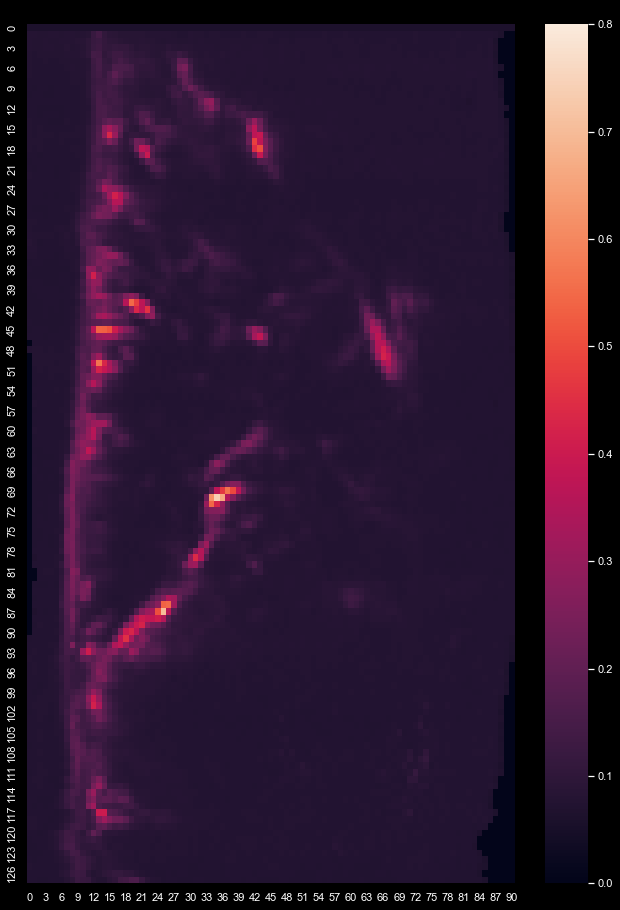

In [21]:








plt.rcParams["figure.figsize"] = [9.1, 12.8]
plt.rcParams["figure.autolayout"] = True

fig = plt.figure()
dimension = (5, 5)
data = io.imread(r"C:\Users\richa\OneDrive\Neuroscience\Data\DBS_preprocessed_ROI_and_3D_data\normalized\TIFF_registered\reg_avg180_300.tiff")
sns.heatmap(data[:, :, 0], vmax=.8)

def init():
    sns.set_theme()
    plt.style.use("dark_background")
    sns.heatmap(data[:, :, 0])

def animate(i):
    data = data[:, :, i]
    sns.heatmap(data, vmax=.8, cbar=False)
    print(i)
    

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=240, repeat=False)

plt.title("[M", fontsize = 15, color = 'Black')
plt.show()




## __[::]__ ToDo

- [+] Fix tiff files, they seem to be only 91x3600 instead of 91x128x3600
- [+] Convert one ref MAT into TIFF
- [+] Convert all 82 MATs into TIFFs
- [+] Make Repo
- [+] Split single tiff file (sample) into first 100-300 frames
- [+] Form Functions
- [+] Split whole data set into first 100-300 frames
- [+] Align one subset of images
- [+] Align the first 300 frames of all 82 mice
- [+] Fix heuristics fx
- [ ] Change reference and substack to 180-300 frames
- [ ] Animate